In [143]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predict-the-success-of-bank-telemarketing/sample_submission.csv
/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv
/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv


In [144]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score

In [145]:
from sklearn.preprocessing import StandardScaler

In [146]:
train_data=pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv")
test_data=pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv")

In [147]:
# dummy_clf= DummyClassifier(strategy= "most_frequent")
# dummy_clf.fit(train_data.drop['target'],train_data['target'])
# predictions=dummy_clf.predict(test_data)
# submission=pd.DataFrame(columns=['id','target'])

In [148]:
train_data.head()

last contact date  age           job  marital  education default  balance  \
0        2009-04-17   26   blue-collar  married  secondary      no      647   
1        2009-10-11   52    technician  married  secondary      no      553   
2        2010-11-20   44   blue-collar  married  secondary      no     1397   
3        2009-09-01   33        admin.  married  secondary      no      394   
4        2008-01-29   31  entrepreneur   single   tertiary      no      137   

  housing loan    contact  duration  campaign  pdays  previous poutcome target  
0     yes   no   cellular       357         2    331         1    other     no  
1     yes   no  telephone       160         1     -1         0      NaN     no  
2      no   no   cellular       326         1     -1         0      NaN     no  
3     yes   no  telephone       104         3     -1         0      NaN     no  
4      no   no   cellular       445         2     -1         0      NaN     no

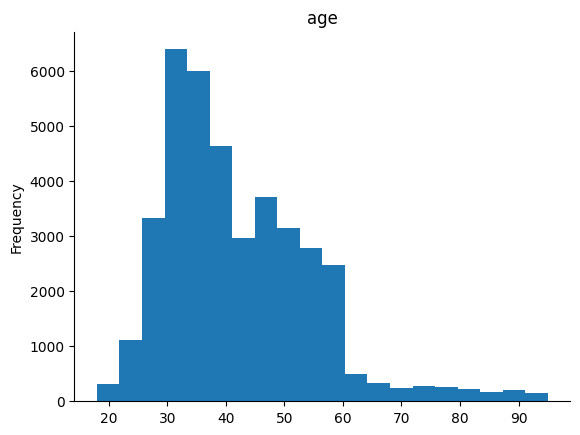

In [149]:
from matplotlib import pyplot as plt
train_data['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [150]:
test_data.head()

last contact date  age          job  marital  education default  balance  \
0        2009-11-21   36   management   single   tertiary      no        7   
1        2010-02-04   30   unemployed  married   tertiary      no     1067   
2        2010-07-28   32  blue-collar   single  secondary      no       82   
3        2010-06-09   38       admin.  married    primary      no     1487   
4        2008-03-02   59   management  married   tertiary      no      315   

  housing loan   contact  duration  campaign  pdays  previous poutcome  
0      no   no       NaN        20         1     -1         0      NaN  
1      no   no  cellular        78         2     -1         0      NaN  
2     yes   no  cellular        86         4     -1         0      NaN  
3      no   no       NaN       332         2     -1         0      NaN  
4      no   no  cellular       591         1    176         2  failure

In [151]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39211 entries, 0 to 39210
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   last contact date  39211 non-null  object
 1   age                39211 non-null  int64 
 2   job                38982 non-null  object
 3   marital            39211 non-null  object
 4   education          37744 non-null  object
 5   default            39211 non-null  object
 6   balance            39211 non-null  int64 
 7   housing            39211 non-null  object
 8   loan               39211 non-null  object
 9   contact            28875 non-null  object
 10  duration           39211 non-null  int64 
 11  campaign           39211 non-null  int64 
 12  pdays              39211 non-null  int64 
 13  previous           39211 non-null  int64 
 14  poutcome           9760 non-null   object
 15  target             39211 non-null  object
dtypes: int64(6), object(10)
memory usage: 4.

In [152]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   last contact date  10000 non-null  object
 1   age                10000 non-null  int64 
 2   job                9941 non-null   object
 3   marital            10000 non-null  object
 4   education          9610 non-null   object
 5   default            10000 non-null  object
 6   balance            10000 non-null  int64 
 7   housing            10000 non-null  object
 8   loan               10000 non-null  object
 9   contact            7316 non-null   object
 10  duration           10000 non-null  int64 
 11  campaign           10000 non-null  int64 
 12  pdays              10000 non-null  int64 
 13  previous           10000 non-null  int64 
 14  poutcome           2492 non-null   object
dtypes: int64(6), object(9)
memory usage: 1.1+ MB


In [153]:
for i in train_data.select_dtypes(exclude='number').columns:
    print(i, 'unique data: ', train_data[i].unique())

last contact date unique data:  ['2009-04-17' '2009-10-11' '2010-11-20' ... '2009-07-05' '2008-02-25'
 '2010-04-12']
job unique data:  ['blue-collar' 'technician' 'admin.' 'entrepreneur' 'unemployed'
 'management' 'services' 'student' 'self-employed' 'retired' 'housemaid'
 nan]
marital unique data:  ['married' 'single' 'divorced']
education unique data:  ['secondary' 'tertiary' 'primary' nan]
default unique data:  ['no' 'yes']
housing unique data:  ['yes' 'no']
loan unique data:  ['no' 'yes']
contact unique data:  ['cellular' 'telephone' nan]
poutcome unique data:  ['other' nan 'failure' 'success']
target unique data:  ['no' 'yes']


In [154]:
for i in test_data.select_dtypes(exclude='number').columns:
    print(i, 'unique data: ', test_data[i].unique())

last contact date unique data:  ['2009-11-21' '2010-02-04' '2010-07-28' '2010-06-09' '2008-03-02'
 '2010-11-20' '2010-04-17' '2010-08-18' '2010-05-26' '2009-08-21'
 '2008-06-05' '2008-05-20' '2009-08-29' '2009-09-09' '2008-05-28'
 '2010-05-18' '2010-07-29' '2010-08-21' '2010-05-08' '2009-05-16'
 '2008-05-14' '2008-06-20' '2009-05-13' '2008-05-13' '2009-02-02'
 '2008-05-25' '2009-05-09' '2009-05-19' '2008-08-13' '2010-01-29'
 '2008-10-27' '2008-06-02' '2010-01-28' '2010-05-13' '2008-05-05'
 '2008-07-18' '2010-07-15' '2009-06-06' '2010-11-21' '2009-07-23'
 '2009-05-06' '2009-11-17' '2008-01-14' '2008-06-18' '2009-11-20'
 '2009-06-20' '2008-07-31' '2008-08-17' '2010-05-05' '2009-06-05'
 '2010-04-20' '2009-08-14' '2008-09-15' '2010-05-30' '2008-05-18'
 '2008-08-29' '2010-03-14' '2008-05-08' '2010-05-29' '2008-07-16'
 '2009-04-30' '2009-11-18' '2008-11-20' '2008-12-06' '2009-05-20'
 '2009-12-28' '2008-07-29' '2010-04-30' '2008-08-26' '2009-05-05'
 '2010-02-02' '2009-02-03' '2009-08-25' '200

In [155]:
def process_date_features(df, date_column):
    df[date_column] = pd.to_datetime(df[date_column])

    df['last_contact_year'] = df[date_column].dt.year
    df['last_contact_month'] = df[date_column].dt.month
    df['last_contact_day'] = df[date_column].dt.day
    df['last_contact_day_of_week'] = df[date_column].dt.dayofweek  # Monday = 0, Sunday = 6
    df['last_contact_quarter'] = df[date_column].dt.quarter

    df.drop(columns=[date_column], inplace=True)

    return df

In [156]:
train_data = process_date_features(train_data, date_column='last contact date')
test_data = process_date_features(test_data, date_column='last contact date')

In [157]:
train_data

age           job   marital  education default  balance housing loan  \
0       26   blue-collar   married  secondary      no      647     yes   no   
1       52    technician   married  secondary      no      553     yes   no   
2       44   blue-collar   married  secondary      no     1397      no   no   
3       33        admin.   married  secondary      no      394     yes   no   
4       31  entrepreneur    single   tertiary      no      137      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
39206   31    technician    single  secondary      no        0     yes   no   
39207   59        admin.   married    primary      no     6187      no   no   
39208   36   blue-collar   married  secondary      no       63     yes   no   
39209   28       student    single  secondary      no     5916      no   no   
39210   51       student  divorced   tertiary     yes    38594     yes   no   

         contact  duration  campaign  pdays  previous poutcome target  \
0       cellular       357         2    331         1    other     no   
1      telephone       160         1     -1         0      NaN     no   
2       cellular       326         1     -1         0      NaN     no   
3      telephone       104         3     -1         0      NaN     no   
4       cellular       445         2     -1         0      NaN     no   
...          ...       ...       ...    ...       ...      ...    ...   
39206   cellular        16        34     -1         0      NaN     no   
39207   cellular       114         4     -1         0      NaN     no   
39208        NaN        56         8     -1         0      NaN     no   
39209   cellular        93         5     -1         0      NaN     no   
39210   cellular      1877        19    780       148  success    yes   

       last_contact_year  last_contact_month  last_contact_day  \
0                   2009                   4                17   
1                   2009                  10                11   
2                   2010                  11                20   
3                   2009                   9                 1   
4                   2008                   1                29   
...                  ...                 ...               ...   
39206               2008                   7                31   
39207               2009                   7                31   
39208               2008                   6                 2   
39209               2010                   3                20   
39210               2010                   3                16   

       last_contact_day_of_week  last_contact_quarter  
0                             4                     2  
1                             6                     4  
2                             5                     4  
3                             1                     3  
4                             1                     1  
...                         ...                   ...  
39206                         3                     3  
39207                         4                     3  
39208                         0                     2  
39209                         5                     1  
39210                         1                     1  

[39211 rows x 20 columns]

In [158]:
for i in train_data.select_dtypes(exclude='number').columns:
    print(i, 'unique data: ', train_data[i].unique())

job unique data:  ['blue-collar' 'technician' 'admin.' 'entrepreneur' 'unemployed'
 'management' 'services' 'student' 'self-employed' 'retired' 'housemaid'
 nan]
marital unique data:  ['married' 'single' 'divorced']
education unique data:  ['secondary' 'tertiary' 'primary' nan]
default unique data:  ['no' 'yes']
housing unique data:  ['yes' 'no']
loan unique data:  ['no' 'yes']
contact unique data:  ['cellular' 'telephone' nan]
poutcome unique data:  ['other' nan 'failure' 'success']
target unique data:  ['no' 'yes']


In [159]:
for i in test_data.select_dtypes(exclude='number').columns:
    print(i, 'unique data: ', test_data[i].unique())

job unique data:  ['management' 'unemployed' 'blue-collar' 'admin.' 'services' 'student'
 'technician' nan 'self-employed' 'retired' 'housemaid' 'entrepreneur']
marital unique data:  ['single' 'married' 'divorced']
education unique data:  ['tertiary' 'secondary' 'primary' nan]
default unique data:  ['no' 'yes']
housing unique data:  ['no' 'yes']
loan unique data:  ['no' 'yes']
contact unique data:  [nan 'cellular' 'telephone']
poutcome unique data:  [nan 'failure' 'other' 'success']


In [160]:
train_data.isnull().sum()[train_data.isnull().sum()!=0]

job            229
education     1467
contact      10336
poutcome     29451
dtype: int64

In [161]:
test_data.isnull().sum()[test_data.isnull().sum()!=0]

job            59
education     390
contact      2684
poutcome     7508
dtype: int64

In [162]:
(train_data == ' ').sum()[(train_data == ' ').sum()!=0]

Series([], dtype: int64)

In [163]:
(test_data == ' ').sum()[(test_data == ' ').sum()!=0]

Series([], dtype: int64)

In [164]:
(train_data.isin(['NA', 'N/A', '-'])).sum()[(train_data.isin(['NA', 'N/A', '-'])).sum()!=0]

Series([], dtype: int64)

In [165]:
(test_data.isin(['NA', 'N/A', '-'])).sum()[(test_data.isin(['NA', 'N/A', '-'])).sum()!=0]

Series([], dtype: int64)

In [166]:
train_data.shape

(39211, 20)

In [167]:
train_data.isna().sum() * 100 /train_data.shape[0]

age                          0.000000
job                          0.584020
marital                      0.000000
education                    3.741297
default                      0.000000
balance                      0.000000
housing                      0.000000
loan                         0.000000
contact                     26.359950
duration                     0.000000
campaign                     0.000000
pdays                        0.000000
previous                     0.000000
poutcome                    75.109026
target                       0.000000
last_contact_year            0.000000
last_contact_month           0.000000
last_contact_day             0.000000
last_contact_day_of_week     0.000000
last_contact_quarter         0.000000
dtype: float64

In [168]:
#Have to choose whether to drop poutcome -75% missing values
# train_data.drop(columns=['poutcome'], inplace=True)
# test_data.drop(columns=['poutcome'], inplace=True)

In [169]:
train_data['target'].value_counts()/train_data.shape[0]

target
no     0.851394
yes    0.148606
Name: count, dtype: float64

In [170]:
train_data[train_data['target']=='yes'].isnull().sum()*100/(train_data[train_data['target']=='yes'].shape[0])

age                          0.000000
job                          0.411876
marital                      0.000000
education                    3.346490
default                      0.000000
balance                      0.000000
housing                      0.000000
loan                         0.000000
contact                      7.156341
duration                     0.000000
campaign                     0.000000
pdays                        0.000000
previous                     0.000000
poutcome                    46.816544
target                       0.000000
last_contact_year            0.000000
last_contact_month           0.000000
last_contact_day             0.000000
last_contact_day_of_week     0.000000
last_contact_quarter         0.000000
dtype: float64

In [171]:
train_data[train_data['job'].isnull()]

age  job  marital  education default  balance housing loan   contact  \
256     40  NaN  married   tertiary      no      119      no   no  cellular   
490     41  NaN   single  secondary      no      646     yes   no       NaN   
564     57  NaN  married        NaN      no      327     yes   no       NaN   
768     52  NaN  married        NaN      no     1571      no   no  cellular   
790     54  NaN  married  secondary      no     1241      no   no       NaN   
...    ...  ...      ...        ...     ...      ...     ...  ...       ...   
38048   51  NaN  married        NaN      no       12      no   no       NaN   
38549   36  NaN  married    primary      no        0      no   no  cellular   
38597   59  NaN  married    primary      no     1470      no   no       NaN   
38637   52  NaN  married  secondary      no      142      no   no  cellular   
38703   31  NaN  married  secondary      no        3      no   no  cellular   

       duration  campaign  pdays  previous poutcome target  last_contact_year  \
256         258         2     -1         0      NaN     no               2009   
490          40         2     -1         0      NaN     no               2010   
564          74         2     -1         0      NaN     no               2008   
768         164         1     -1         0      NaN     no               2010   
790          97         6     -1         0      NaN     no               2009   
...         ...       ...    ...       ...      ...    ...                ...   
38048        45         1     -1         0      NaN     no               2009   
38549       238         2     -1         0      NaN     no               2009   
38597        74         1     -1         0      NaN     no               2009   
38637       112         6     -1         0      NaN     no               2008   
38703        91         2     -1         0      NaN     no               2009   

       last_contact_month  last_contact_day  last_contact_day_of_week  \
256                     8                19                         2   
490                     5                29                         5   
564                     5                28                         2   
768                     8                 4                         2   
790                     6                16                         1   
...                   ...               ...                       ...   
38048                   6                11                         3   
38549                   8                21                         4   
38597                   6                 5                         4   
38637                   8                25                         0   
38703                   7                20                         0   

       last_contact_quarter  
256                       3  
490                       2  
564                       2  
768                       3  
790                       2  
...                     ...  
38048                     2  
38549                     3  
38597                     2  
38637                     3  
38703                     3  

[229 rows x 20 columns]

In [172]:
train_data.drop(columns='poutcome', inplace=True)
test_data.drop(columns='poutcome', inplace=True)

In [173]:
train_data

age           job   marital  education default  balance housing loan  \
0       26   blue-collar   married  secondary      no      647     yes   no   
1       52    technician   married  secondary      no      553     yes   no   
2       44   blue-collar   married  secondary      no     1397      no   no   
3       33        admin.   married  secondary      no      394     yes   no   
4       31  entrepreneur    single   tertiary      no      137      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
39206   31    technician    single  secondary      no        0     yes   no   
39207   59        admin.   married    primary      no     6187      no   no   
39208   36   blue-collar   married  secondary      no       63     yes   no   
39209   28       student    single  secondary      no     5916      no   no   
39210   51       student  divorced   tertiary     yes    38594     yes   no   

         contact  duration  campaign  pdays  previous target  \
0       cellular       357         2    331         1     no   
1      telephone       160         1     -1         0     no   
2       cellular       326         1     -1         0     no   
3      telephone       104         3     -1         0     no   
4       cellular       445         2     -1         0     no   
...          ...       ...       ...    ...       ...    ...   
39206   cellular        16        34     -1         0     no   
39207   cellular       114         4     -1         0     no   
39208        NaN        56         8     -1         0     no   
39209   cellular        93         5     -1         0     no   
39210   cellular      1877        19    780       148    yes   

       last_contact_year  last_contact_month  last_contact_day  \
0                   2009                   4                17   
1                   2009                  10                11   
2                   2010                  11                20   
3                   2009                   9                 1   
4                   2008                   1                29   
...                  ...                 ...               ...   
39206               2008                   7                31   
39207               2009                   7                31   
39208               2008                   6                 2   
39209               2010                   3                20   
39210               2010                   3                16   

       last_contact_day_of_week  last_contact_quarter  
0                             4                     2  
1                             6                     4  
2                             5                     4  
3                             1                     3  
4                             1                     1  
...                         ...                   ...  
39206                         3                     3  
39207                         4                     3  
39208                         0                     2  
39209                         5                     1  
39210                         1                     1  

[39211 rows x 19 columns]

In [174]:
train_data.isna().sum() * 100 /train_data.shape[0]

age                          0.000000
job                          0.584020
marital                      0.000000
education                    3.741297
default                      0.000000
balance                      0.000000
housing                      0.000000
loan                         0.000000
contact                     26.359950
duration                     0.000000
campaign                     0.000000
pdays                        0.000000
previous                     0.000000
target                       0.000000
last_contact_year            0.000000
last_contact_month           0.000000
last_contact_day             0.000000
last_contact_day_of_week     0.000000
last_contact_quarter         0.000000
dtype: float64

In [175]:
def convert_to_np_nan(data):
    data = data.replace([None, 'None', 'NA', 'NaN', 'null', ''], np.nan)

    data = data.applymap(lambda x: np.nan if isinstance(x, str) and x.strip() == '' else x)

    return data

train_data = convert_to_np_nan(train_data)
test_data = convert_to_np_nan(test_data)

/tmp/ipykernel_30/4008671944.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: np.nan if isinstance(x, str) and x.strip() == '' else x)


In [176]:
train_data['contact'].unique()

array(['cellular', 'telephone', nan], dtype=object)

In [177]:
train_data[train_data['target']=='no'].isnull().sum()*100/(train_data[train_data['target']=='no'].shape[0])

age                          0.000000
job                          0.614067
marital                      0.000000
education                    3.810208
default                      0.000000
balance                      0.000000
housing                      0.000000
loan                         0.000000
contact                     29.711838
duration                     0.000000
campaign                     0.000000
pdays                        0.000000
previous                     0.000000
target                       0.000000
last_contact_year            0.000000
last_contact_month           0.000000
last_contact_day             0.000000
last_contact_day_of_week     0.000000
last_contact_quarter         0.000000
dtype: float64

In [178]:
train_data['contact'] = train_data['contact'].fillna('unknown')
# #### considering there could be other approach to contact such as webinars, gmeet invites etc..
test_data['contact'] = test_data['contact'].fillna('unknown')

In [179]:
train_data['education'].value_counts()/train_data.shape[0]
#since secondary education is the majority, there is also a possibility that the unkown is actually not educated at all

education
secondary    0.499452
tertiary     0.296218
primary      0.166917
Name: count, dtype: float64

In [180]:
train_data['education'] = train_data['education'].fillna('unknown')
test_data['education'] = test_data['education'].fillna('unknown')

In [181]:
#since nan jobs are low percentage, we can impute them

In [182]:
from sklearn.impute import SimpleImputer

job_imputer = SimpleImputer(strategy='most_frequent')

train_data['job'] = job_imputer.fit_transform(train_data[['job']]).flatten()

test_data['job'] = job_imputer.transform(test_data[['job']]).flatten()

In [183]:
train_data.isna().sum() * 100 /train_data.shape[0]

age                         0.0
job                         0.0
marital                     0.0
education                   0.0
default                     0.0
balance                     0.0
housing                     0.0
loan                        0.0
contact                     0.0
duration                    0.0
campaign                    0.0
pdays                       0.0
previous                    0.0
target                      0.0
last_contact_year           0.0
last_contact_month          0.0
last_contact_day            0.0
last_contact_day_of_week    0.0
last_contact_quarter        0.0
dtype: float64

In [184]:
train_data

age           job   marital  education default  balance housing loan  \
0       26   blue-collar   married  secondary      no      647     yes   no   
1       52    technician   married  secondary      no      553     yes   no   
2       44   blue-collar   married  secondary      no     1397      no   no   
3       33        admin.   married  secondary      no      394     yes   no   
4       31  entrepreneur    single   tertiary      no      137      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
39206   31    technician    single  secondary      no        0     yes   no   
39207   59        admin.   married    primary      no     6187      no   no   
39208   36   blue-collar   married  secondary      no       63     yes   no   
39209   28       student    single  secondary      no     5916      no   no   
39210   51       student  divorced   tertiary     yes    38594     yes   no   

         contact  duration  campaign  pdays  previous target  \
0       cellular       357         2    331         1     no   
1      telephone       160         1     -1         0     no   
2       cellular       326         1     -1         0     no   
3      telephone       104         3     -1         0     no   
4       cellular       445         2     -1         0     no   
...          ...       ...       ...    ...       ...    ...   
39206   cellular        16        34     -1         0     no   
39207   cellular       114         4     -1         0     no   
39208    unknown        56         8     -1         0     no   
39209   cellular        93         5     -1         0     no   
39210   cellular      1877        19    780       148    yes   

       last_contact_year  last_contact_month  last_contact_day  \
0                   2009                   4                17   
1                   2009                  10                11   
2                   2010                  11                20   
3                   2009                   9                 1   
4                   2008                   1                29   
...                  ...                 ...               ...   
39206               2008                   7                31   
39207               2009                   7                31   
39208               2008                   6                 2   
39209               2010                   3                20   
39210               2010                   3                16   

       last_contact_day_of_week  last_contact_quarter  
0                             4                     2  
1                             6                     4  
2                             5                     4  
3                             1                     3  
4                             1                     1  
...                         ...                   ...  
39206                         3                     3  
39207                         4                     3  
39208                         0                     2  
39209                         5                     1  
39210                         1                     1  

[39211 rows x 19 columns]

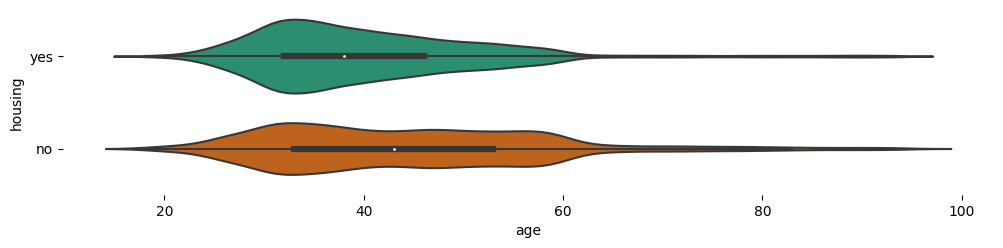

In [185]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(train_data['housing'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(train_data, x='age', y='housing', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [186]:
# 20-40 aged people are more havin housing loans, while median age for housing
# loans are with younger people %%

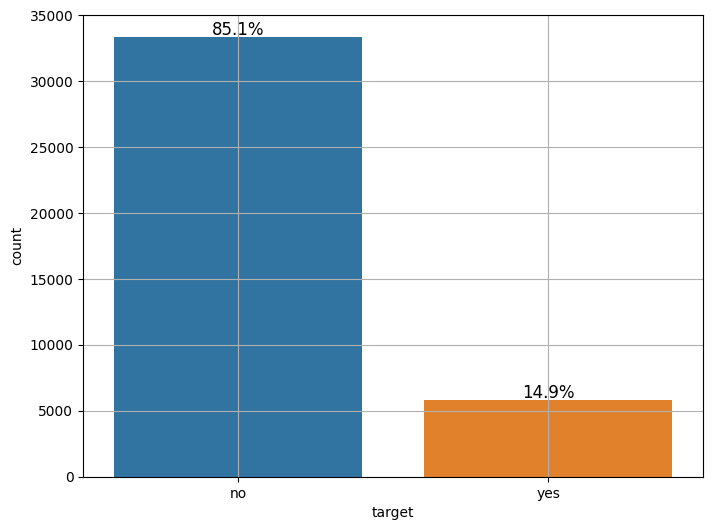

In [187]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x='target', data=train_data)
plt.grid(True)

total_count = train_data.shape[0]
for p in ax.patches:
    percentage = 100 * p.get_height() / total_count
    ax.annotate(f'{percentage:.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12,
                xytext=(0, 5),
                textcoords='offset points')

plt.show()

In [188]:
#only 15% are saying yes to the deposit

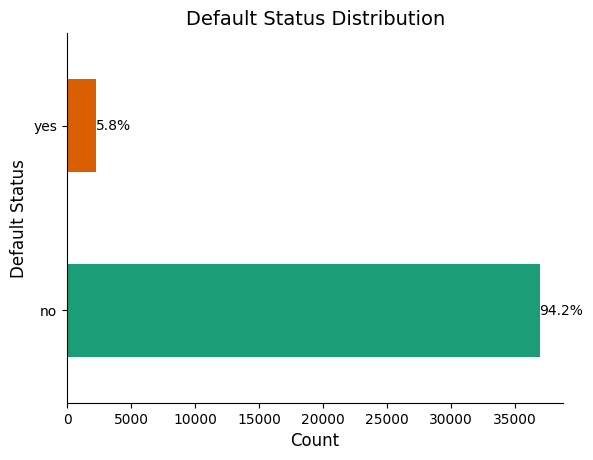

In [189]:
default_counts = train_data['default'].value_counts()
default_percentages = (default_counts / len(train_data)) * 100

ax = default_counts.plot(
    kind='barh',
    color=sns.palettes.mpl_palette('Dark2')
)

for i, (count, percentage) in enumerate(zip(default_counts, default_percentages)):
    ax.text(
        count, i,
        f'{percentage:.1f}%',
        va='center',
        ha='left',
        fontsize=10
    )

plt.gca().spines[['top', 'right']].set_visible(False)

plt.title('Default Status Distribution', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Default Status', fontsize=12)

plt.show()

In [190]:
# only 6% of the marketed poppulation has defaulted in any loans

In [191]:
train_data.groupby('housing').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [192]:
#almost half of the target population already has housing loans -> almost most young people could have housing loans

In [193]:
train_data.groupby('education').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [194]:
train_data.groupby('marital').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

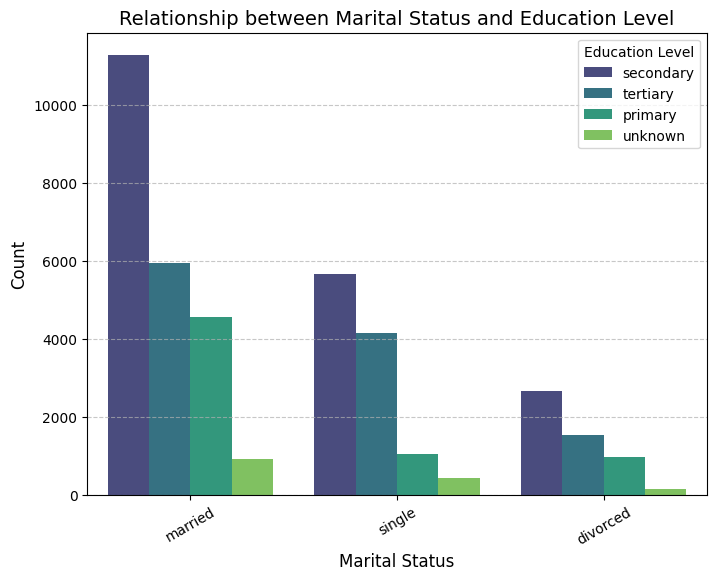

In [195]:
plt.figure(figsize=(8, 6))
sns.countplot(
    data=train_data,
    x='marital',
    hue='education',
    palette='viridis'
)
plt.title('Relationship between Marital Status and Education Level', fontsize=14)
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Education Level', fontsize=10)
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [196]:
#education levels are similar regardless of marital status

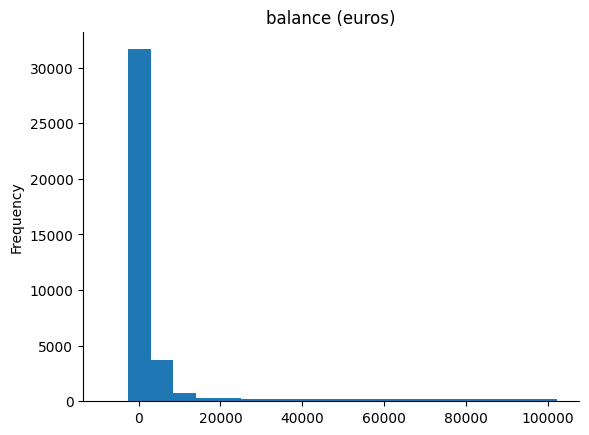

In [197]:
train_data['balance'].plot(kind='hist', bins=20, title='balance (euros)')
plt.gca().spines[['top', 'right',]].set_visible(False)

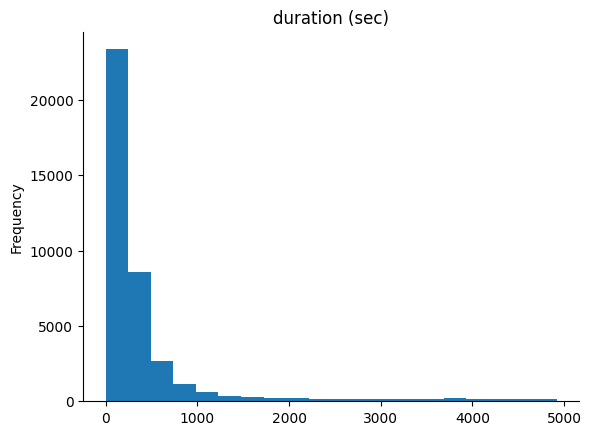

In [198]:
from matplotlib import pyplot as plt
train_data['duration'].plot(kind='hist', bins=20, title='duration (sec)')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [199]:
from matplotlib import pyplot as plt
train_data['duration'].plot(kind='hist', bins=20, title='duration (sec)')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlim(0, 1000)

(0.0, 1000.0)

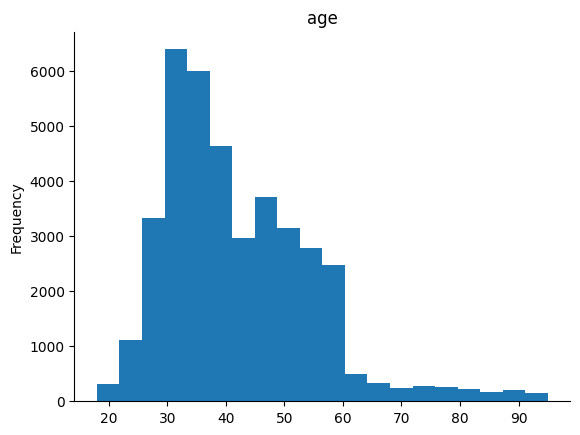

In [200]:
from matplotlib import pyplot as plt
train_data['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

# 30-40 age group contacted the most

Customers with higher balances are more likely to subscribe to the term deposit

In [201]:
sns.boxplot(x='target', y='balance', data=train_data)
plt.show()

In [202]:
sns.violinplot(x='target', y='balance', data=train_data)
plt.show()

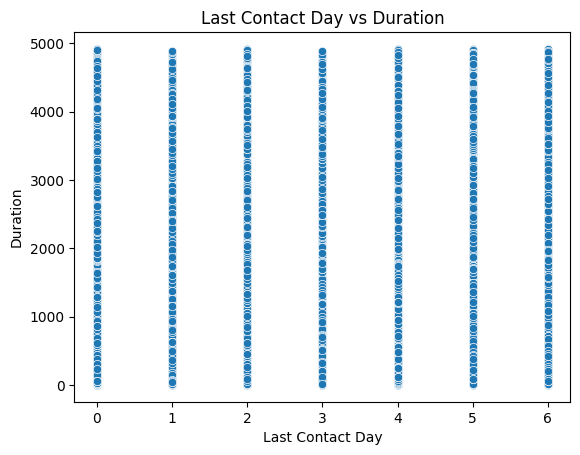

In [203]:
sns.scatterplot(x='last_contact_day_of_week', y='duration', data=train_data)
plt.title('Last Contact Day vs Duration')
plt.xlabel('Last Contact Day')
plt.ylabel('Duration')
plt.show()

In [204]:
sns.violinplot(x='target', y='duration', data=train_data)
plt.show()

In [205]:
train_data['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [206]:
train_data['target'].unique()

array(['no', 'yes'], dtype=object)

In [207]:
sns.pairplot(train_data[['age', 'balance', 'duration', 'campaign', 'target']], hue='target')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

In [208]:
# no inference from the pairplot

In [209]:
plt.figure(figsize=(6,4))
sns.violinplot(x= 'target', y = 'campaign', data = train_data)
plt.ylim(0, 50)
plt.title('Voilin Plot')
plt.show()

In [210]:
plt.figure(figsize=(6,4))
sns.scatterplot(x = 'duration', y = 'previous', data = train_data)
plt.title('Scatter Plot')
plt.show()

In [211]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39211 entries, 0 to 39210
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       39211 non-null  int64 
 1   job                       39211 non-null  object
 2   marital                   39211 non-null  object
 3   education                 39211 non-null  object
 4   default                   39211 non-null  object
 5   balance                   39211 non-null  int64 
 6   housing                   39211 non-null  object
 7   loan                      39211 non-null  object
 8   contact                   39211 non-null  object
 9   duration                  39211 non-null  int64 
 10  campaign                  39211 non-null  int64 
 11  pdays                     39211 non-null  int64 
 12  previous                  39211 non-null  int64 
 13  target                    39211 non-null  object
 14  last_contact_year     

In [212]:
numerical_features = train_data.select_dtypes(include = ['int64'])
numerical_features['target'] = train_data['target'].apply(lambda x: 1 if x == 'yes' else 0)

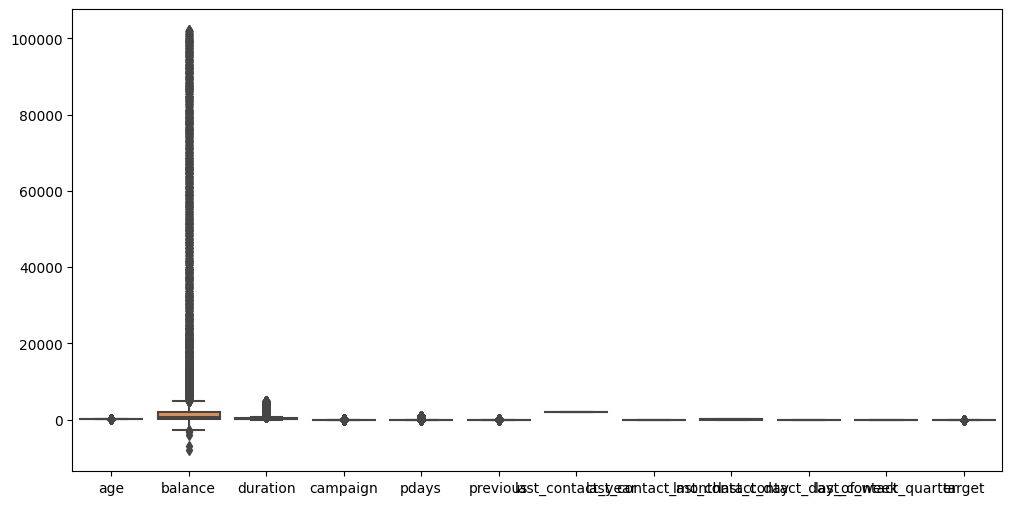

In [213]:
plt.figure(figsize = (12,6))
sns.boxplot(numerical_features)
plt.show()

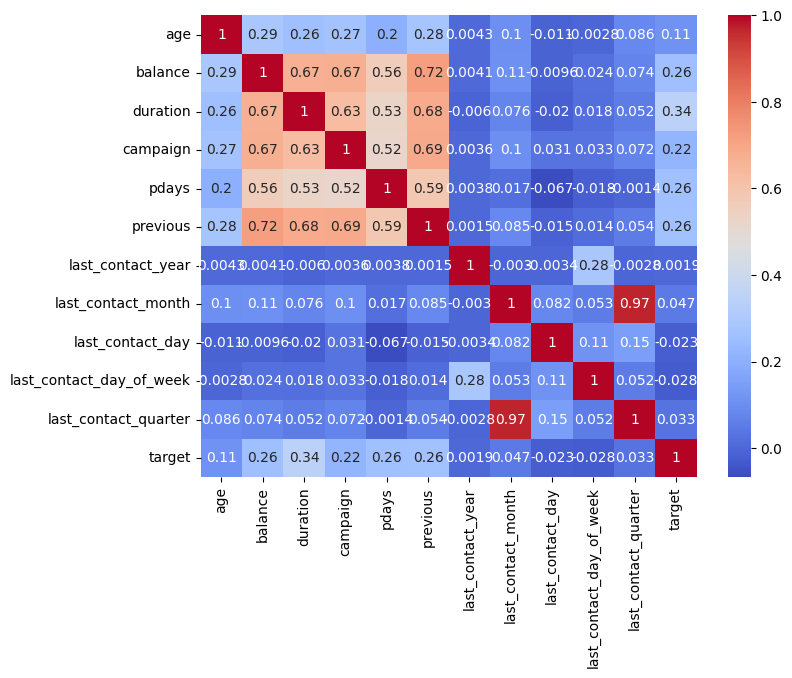

In [214]:
plt.figure(figsize = (8,6))
sns.heatmap(numerical_features.corr(), annot =  True, cmap = 'coolwarm')
plt.show()

In [215]:
numerical_features.drop(columns = 'target', inplace = True)

In [216]:
# corr_matrix = numerical_features.corr()

# threshold = 0.35

# drop_columns = [col for col in corr_matrix.columns if all(abs(corr_matrix[col]) < threshold)]

# train_data = train_data.drop(columns=drop_columns)
# test_data=test_data.drop(columns=drop_columns)

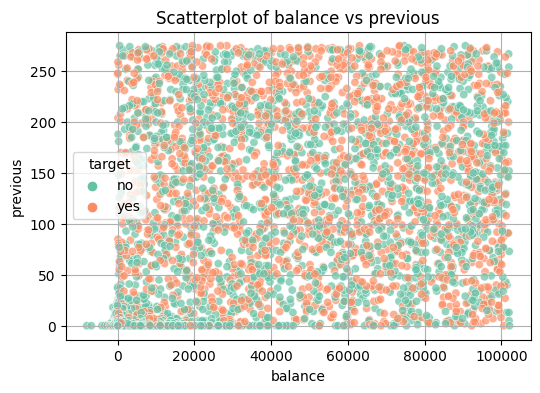

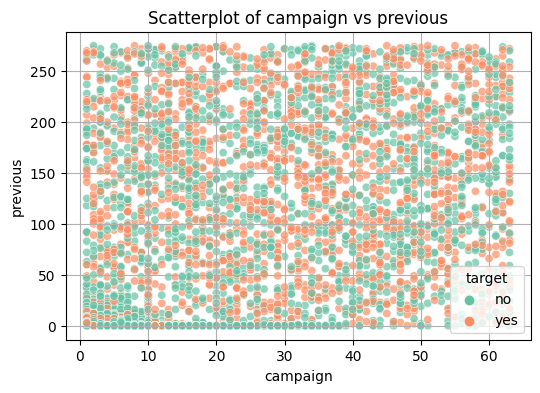

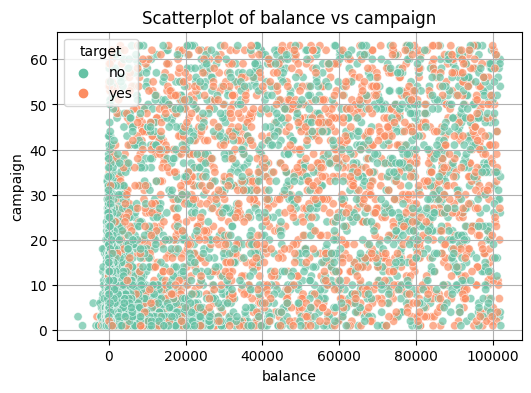

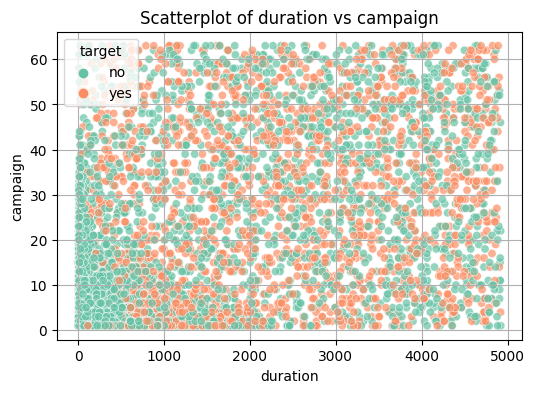

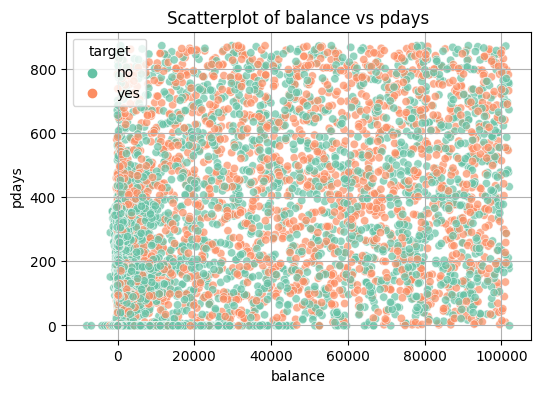

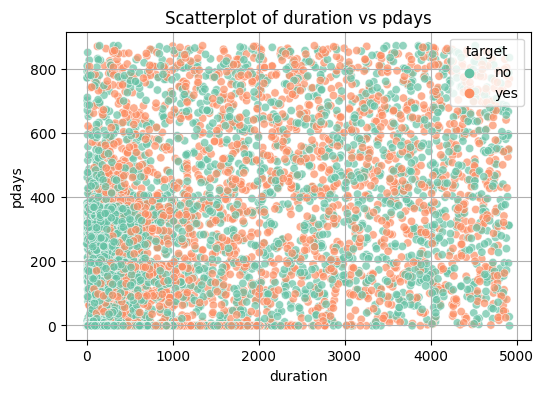

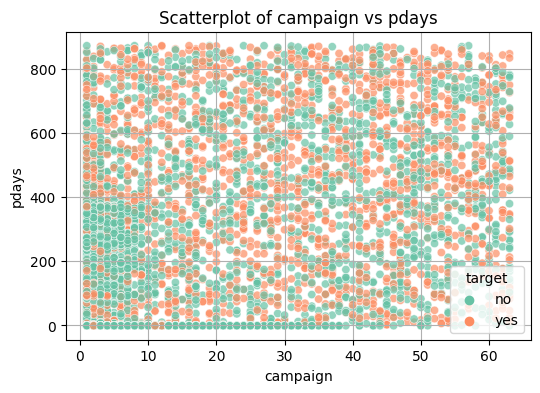

In [217]:
correlating_pairs = [
    ('balance', 'previous'),
    ('campaign', 'previous'),
    ('duration', 'previous'),
    ('balance', 'campaign'),
    ('balance', 'duration'),
    ('duration', 'campaign'),
    ('balance', 'pdays'),
    ('duration', 'pdays'),
    ('campaign', 'pdays'),
]

for pair in correlating_pairs:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=train_data, x=pair[0], y=pair[1], hue='target', alpha=0.7, palette='Set2')
    plt.title(f"Scatterplot of {pair[0]} vs {pair[1]}")
    plt.grid(True)
    plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

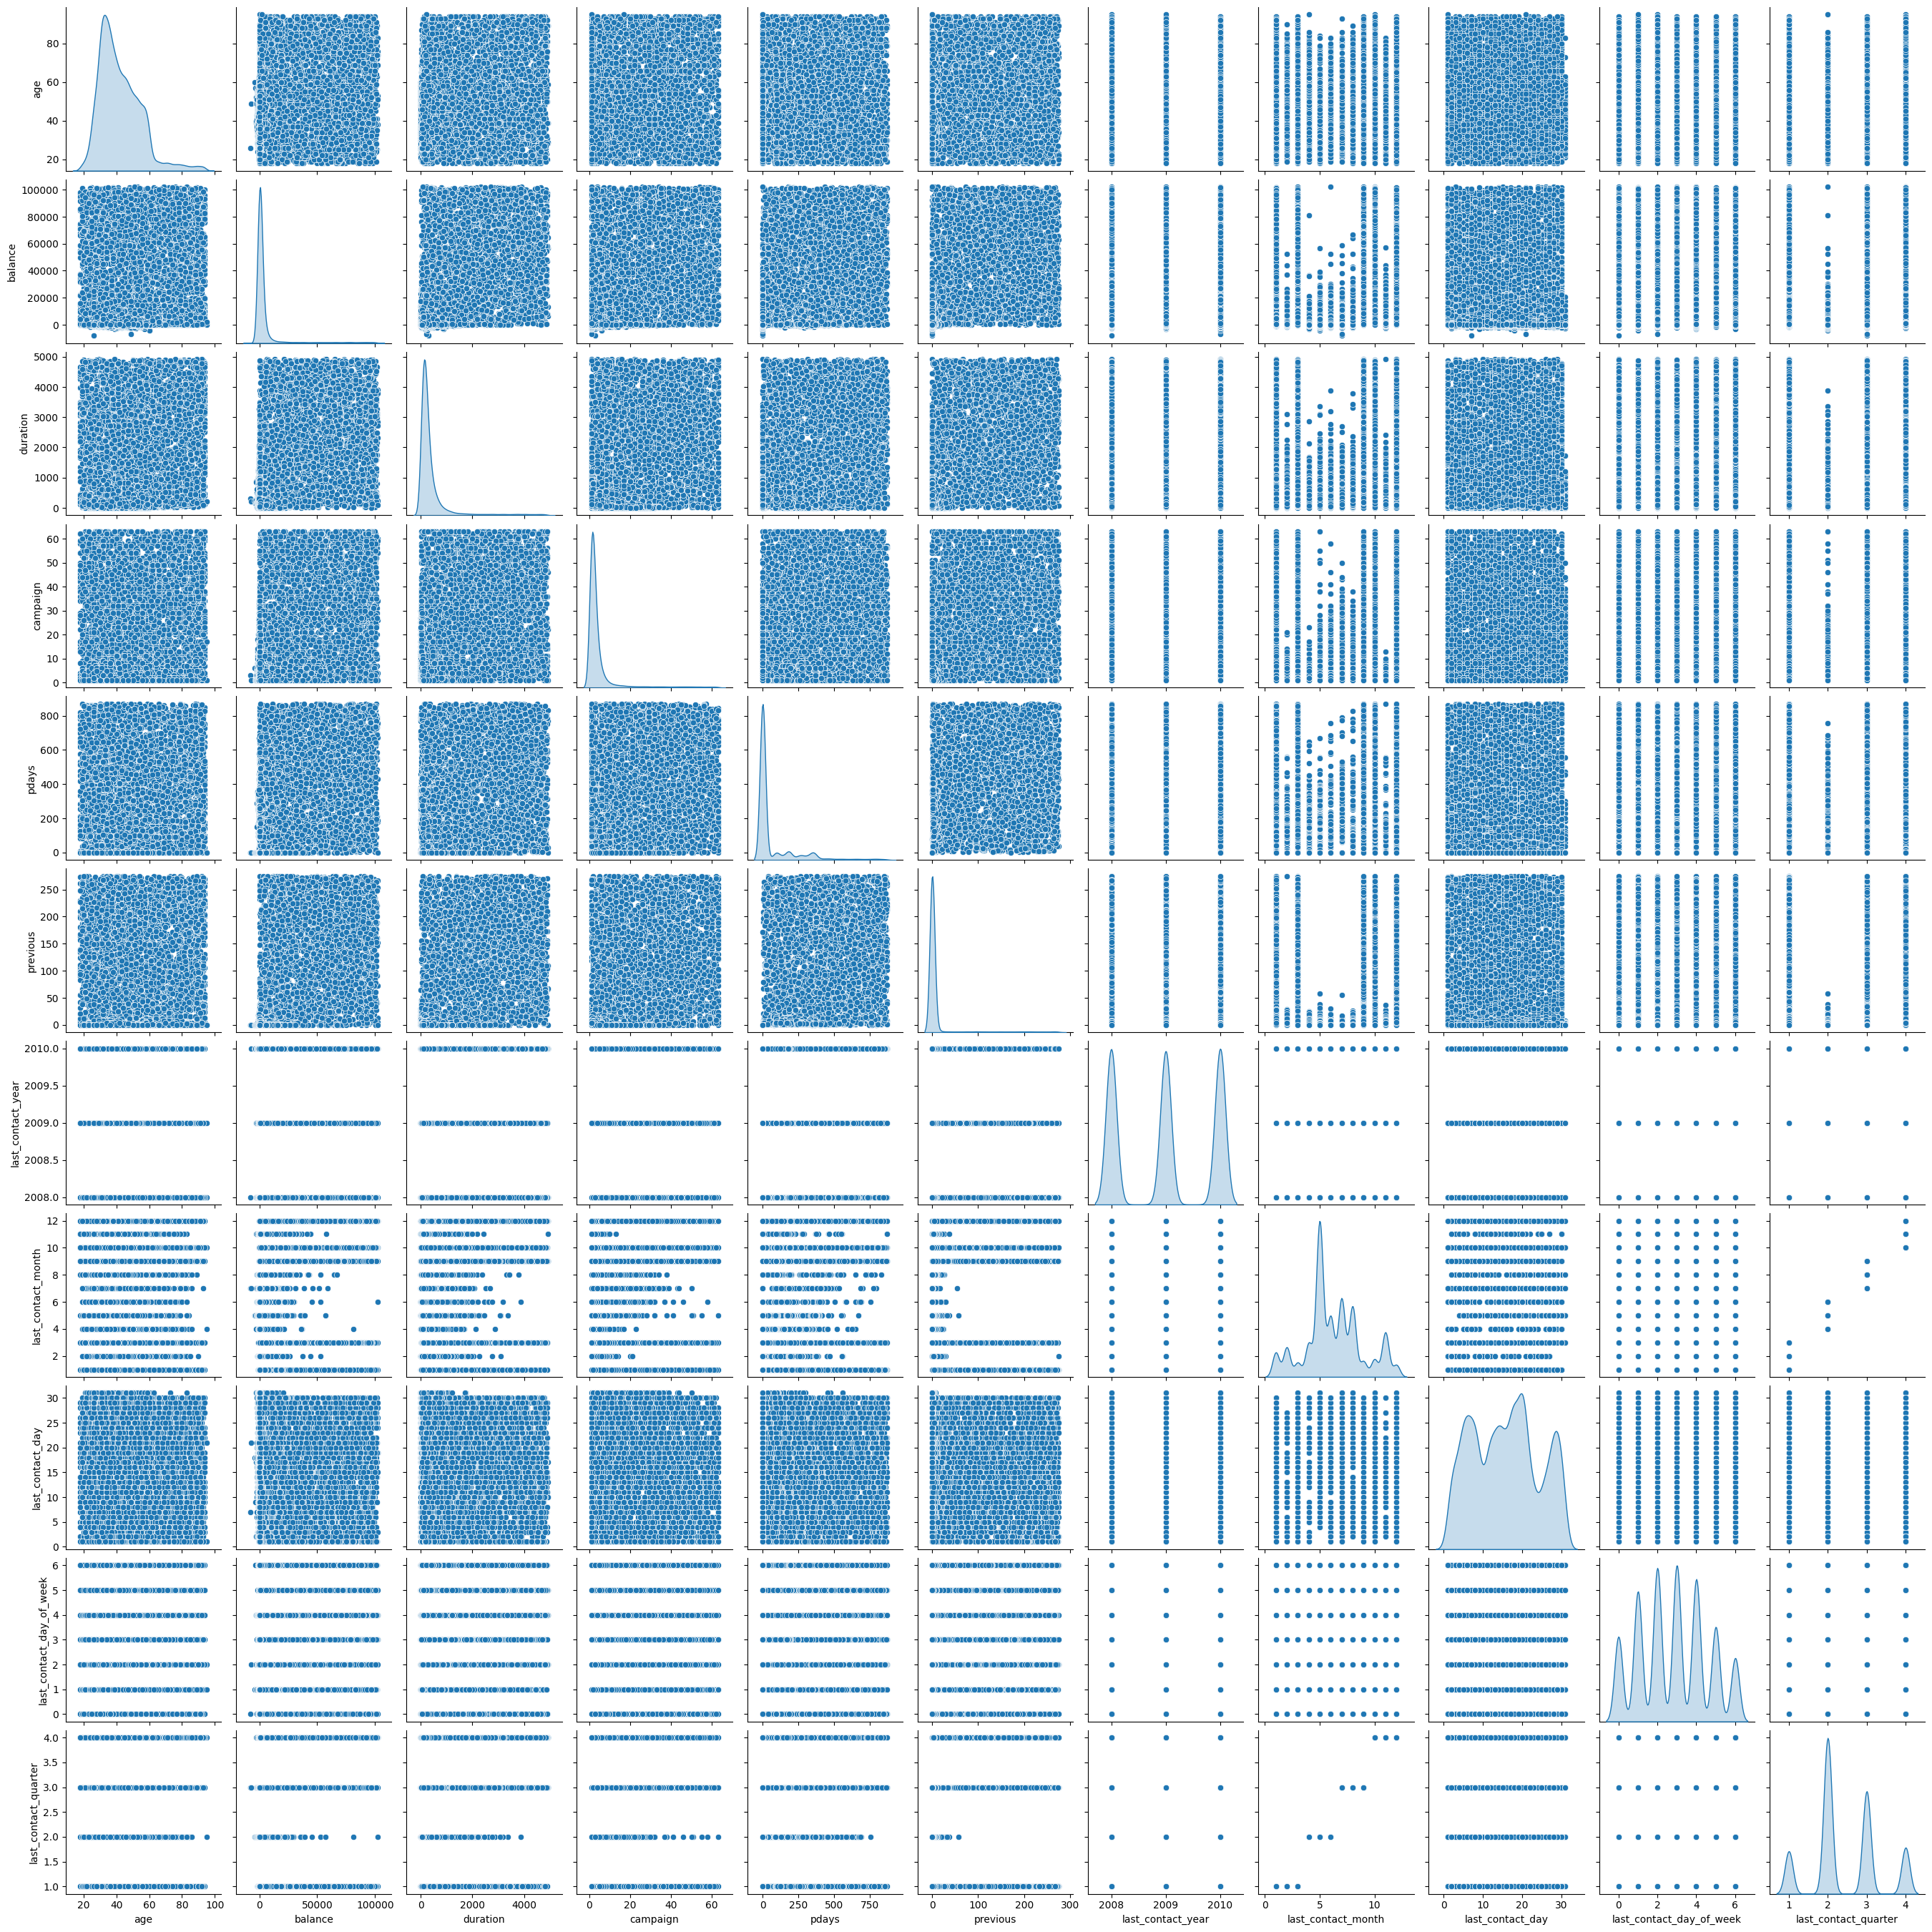

In [218]:
sns.pairplot(numerical_features, diag_kind = 'kde')
plt.show()

In [219]:
X = train_data.drop(columns=['target'])
y = train_data['target']

In [220]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [221]:
cat = X.select_dtypes(exclude='number').columns
num = X.select_dtypes(include='number').columns

In [222]:
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [223]:
num_pipeline = Pipeline([('num_imputer',SimpleImputer(strategy='mean')),('scale',StandardScaler())])
cat_pipeline = Pipeline([('cat_imputer',SimpleImputer(strategy='most_frequent')),('onehot',OneHotEncoder(handle_unknown='ignore'))])

In [224]:
Transformer=ColumnTransformer([('num_pipe',num_pipeline,num),('cat_pipe',cat_pipeline,cat)])
X_train_transformed=Transformer.fit_transform(x_train)
X_test_transformed=Transformer.transform(x_test)
test_data_transformed=Transformer.transform(test_data)

In [225]:
num_columns = num

cat_columns = Transformer.transformers_[1][1].named_steps['onehot'].get_feature_names_out(cat)

all_columns = list(num_columns) + list(cat_columns)
all_columns

['age',
 'balance',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'last_contact_year',
 'last_contact_month',
 'last_contact_day',
 'last_contact_day_of_week',
 'last_contact_quarter',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_primary',
 'education_secondary',
 'education_tertiary',
 'education_unknown',
 'default_no',
 'default_yes',
 'housing_no',
 'housing_yes',
 'loan_no',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'contact_unknown']

In [226]:
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=all_columns)
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=all_columns)
test_data_transformed_df = pd.DataFrame(test_data_transformed, columns=all_columns)

In [227]:
target_mapping = {'no': 0, 'yes': 1}
y_train_encoded = y_train.map(target_mapping)
y_test_encoded = y_test.map(target_mapping)

In [228]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
smote = SMOTE(random_state=42)

In [229]:
X_train_smote, y_train_encoded_smote = smote.fit_resample(X_train_transformed_df, y_train_encoded)
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_encoded_smote.value_counts())

Before SMOTE: target
no     26671
yes     4697
Name: count, dtype: int64
After SMOTE: target
0    26671
1    26671
Name: count, dtype: int64


In [230]:
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier

In [231]:
X_train_transformed_df.shape

(31368, 38)

In [232]:
from sklearn.model_selection import cross_val_score

In [233]:
for n in range(5,35,5):
    svd = TruncatedSVD(n_components=n)
    X_train_reduced = svd.fit_transform(X_train_transformed)
    clf = RandomForestClassifier(random_state=42)
    scores = cross_val_score(clf, X_train_reduced, y_train_encoded, cv=5,scoring='f1_macro')
    print(f"n_components={n}, Mean CV Score: {scores.mean()}")

n_components=5, Mean CV Score: 0.6006707967697149
n_components=10, Mean CV Score: 0.6188130093632085
n_components=15, Mean CV Score: 0.6644182095775493
n_components=20, Mean CV Score: 0.660986034412087
n_components=25, Mean CV Score: 0.660119892604115
n_components=30, Mean CV Score: 0.659526491288781


In [234]:
svd = TruncatedSVD(n_components=15)
X_train_svd = pd.DataFrame(svd.fit_transform(X_train_transformed_df))
X_test_svd = pd.DataFrame(svd.transform(X_test_transformed_df))
test_data_svd=pd.DataFrame(svd.transform(test_data_transformed_df))

In [235]:
#SVD using SMOTE

In [236]:
for n in range(5,35,5):
    svd = TruncatedSVD(n_components=n)
    X_train_reduced = svd.fit_transform(X_train_smote)
    clf = RandomForestClassifier(random_state=42)
    scores = cross_val_score(clf, X_train_smote, y_train_encoded_smote, cv=5,scoring='f1_macro')
    print(f"n_components={n}, Mean CV Score: {scores.mean()}")

n_components=5, Mean CV Score: 0.9104687548155261
n_components=10, Mean CV Score: 0.9104687548155261
n_components=15, Mean CV Score: 0.9104687548155261
n_components=20, Mean CV Score: 0.9104687548155261
n_components=25, Mean CV Score: 0.9104687548155261
n_components=30, Mean CV Score: 0.9104687548155261


In [237]:
svd = TruncatedSVD(n_components=10)
X_train_svd_smote = pd.DataFrame(svd.fit_transform(X_train_smote))
X_test_svd_smote = pd.DataFrame(svd.transform(X_test_transformed))
test_data_svd_smote=pd.DataFrame(svd.transform(test_data_transformed))

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but TruncatedSVD was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but TruncatedSVD was fitted with feature names
  warnings.warn(


In [238]:
y_train_encoded.unique()

array([0, 1])

In [239]:
# from sklearn.feature_selection import SelectKBest, f_regression
# selector = SelectKBest(score_func = f_regression)

In [240]:
from xgboost import XGBClassifier

In [241]:
from sklearn.metrics import make_scorer, f1_score

In [242]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [243]:
f1_macro_scorer = make_scorer(f1_score, average='macro')

xgb_clf = XGBClassifier(
    random_state=42,
    eval_metric='logloss'
)

param_grid = {
    'n_estimators': [50, 100, 200],        # Number of trees
    'learning_rate': [0.01, 0.1, 0.2],    # Learning rate
    'max_depth': [3, 5, 7],               # Maximum depth of trees
    'subsample': [0.6, 0.8, 1.0],         # Subsample ratio of training instances
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    scoring=f1_macro_scorer,
    cv=cv,
    verbose=1,
    n_jobs=-1 )

In [244]:
grid_search.fit(X_train_svd, y_train_encoded)
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Macro Score:", grid_search.best_score_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.6}
Best F1 Macro Score: 0.7001403628329907


In [245]:
#GridSearch CV for SMOTE+ SVD + XGBoost

In [ ]:
grid_search.fit(X_train_svd_smote, y_train_encoded_smote)
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Macro Score:", grid_search.best_score_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


In [ ]:
best_model_xgb_smote_svd = grid_search.best_estimator_
y_test_pred = best_model_xgb_smote_svd.predict(X_test_svd_smote)
f1_score(y_test_encoded, y_test_pred, average='macro')

In [ ]:
#PCA

In [ ]:
from sklearn.decomposition import PCA

best_score = 0
best_n_components = 0

results = {}

for n in range(5, X_train_smote.shape[1], 5):
    pca = PCA(n_components=n)
    X_train_reduced = pca.fit_transform(X_train_smote)
    
    clf = RandomForestClassifier(random_state=42)
    scores = cross_val_score(clf, X_train_reduced, y_train_encoded_smote, cv=5, scoring='f1_macro')
    mean_score = scores.mean()
    results[n] = mean_score 
    

    if mean_score > best_score:
        best_score = mean_score
        best_n_components = n

In [ ]:
pca = PCA(n_components=best_n_components) 
X_train_smote_pca = pca.fit_transform(X_train_smote)
X_test_smote_pca=pca.transform(X_test_smote)
test_data_smote_pca = pca.transform(test_data_transformed_df)

In [ ]:
grid_search.fit(X_train_smote_pca, y_train_encoded_smote)
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Macro Score:", grid_search.best_score_)

In [ ]:
best_model_xgb_smote_pca = grid_search.best_estimator_
y_test_pred = best_model_xgb_smote_pca.predict(X_test_pca_smote)
f1_score(y_test_encoded, y_test_pred, average='macro')

In [ ]:
#trying SVM - computationally heavy
from sklearn.svm import SVC
vm_model = SVC(kernel='rbf', random_state=42) 
svm_model.fit(X_train_smote_pca, y_train_encoded_smote)
y_pred = svm_model.predict(X_test_smote_pca)
print(classification_report(y_test_encoded_smote, y_pred))

In [ ]:
#Select KBest

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score
import numpy as np

f1_macro_scorer = make_scorer(f1_score, average='macro')

k_values = range(1, X_train_transformed_df.shape[1] + 1)

best_f1_score = -1
best_k = None

for k in k_values:
    selector = SelectKBest(score_func=f_classif, k=k)
    X_train_selected = selector.fit_transform(X_train_transformed_df, y_train_encoded)

    clf = XGBClassifier(
    random_state=42,
    learning_rate=0.2,
    max_depth=5,
    n_estimators=200,
    subsample=0.8
)
    f1_scores = cross_val_score(clf, X_train_selected, y_train_encoded, cv=5, scoring=f1_macro_scorer)

    mean_f1 = np.mean(f1_scores)

    if mean_f1 > best_f1_score:
        best_f1_score = mean_f1
        best_k = k

print(f"Best number of features (k): {best_k}")
print(f"Best macro F1 score: {best_f1_score}")

final_selector = SelectKBest(score_func=f_classif, k=best_k)
X_train_best = final_selector.fit_transform(X_train_transformed_df, y_train_encoded)
X_test_best = final_selector.transform(X_test_transformed_df)

In [ ]:
X_train_skb = X_train_best
X_test_skb = X_test_best
test_data_skb = final_selector.transform(test_data_transformed_df)

In [ ]:
X_train_skb = pd.DataFrame(X_train_skb)
X_test_skb = pd.DataFrame(X_test_skb)
test_data_skb=pd.DataFrame(test_data_skb)

In [ ]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(random_state = 42, max_iter = 1000)
lg.fit(X_train_skb, y_train_encoded)
y_pred_svd = lg.predict(X_test_skb)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
f1_score(y_test_encoded, y_pred_svd, average='macro')

In [ ]:
print(classification_report(y_test_encoded, y_pred_svd))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state = 42)

In [ ]:
dtc.fit(X_train_skb, y_train_encoded)
y_pred_dtc = dtc.predict(X_test_skb)

In [ ]:
accuracy_score(y_test_encoded, y_pred_dtc)

In [ ]:
f1_score(y_test_encoded, y_pred_dtc, average='macro')

In [ ]:
print(classification_report(y_test_encoded, y_pred_dtc))

In [ ]:
# SMOTE+ SKB

In [ ]:
f1_macro_scorer = make_scorer(f1_score, average='macro')

k_values = range(1, X_train_smote.shape[1] + 1)

best_f1_score = -1
best_k = None

for k in k_values:
    selector = SelectKBest(score_func=f_classif, k=k)
    X_train_selected = selector.fit_transform(X_train_smote, y_train_encoded_smote)

    clf = XGBClassifier(
    random_state=42,
    learning_rate=0.2,
    max_depth=5,
    n_estimators=200,
    subsample=0.8
)
    f1_scores = cross_val_score(clf, X_train_selected, y_train_encoded_smote, cv=5, scoring=f1_macro_scorer)

    mean_f1 = np.mean(f1_scores)

    if mean_f1 > best_f1_score:
        best_f1_score = mean_f1
        best_k = k

print(f"Best number of features (k): {best_k}")
print(f"Best macro F1 score: {best_f1_score}")

final_selector = SelectKBest(score_func=f_classif, k=best_k)
X_train_best = final_selector.fit_transform(X_train_smote, y_train_encoded_smote)

In [ ]:
X_test_best = final_selector.transform(X_test_transformed_df)

In [ ]:
X_train_skb_smote = X_train_best
X_test_skb_smote = X_test_best
test_data_skb_smote = final_selector.transform(test_data_transformed_df)

In [ ]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(random_state = 42, max_iter = 1000)
lg.fit(X_train_skb_smote, y_train_encoded_smote)
y_pred_skb_smote = lg.predict(X_test_skb_smote)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
f1_score(y_test_encoded, y_pred_skb_smote, average='macro')

In [ ]:
print(classification_report(y_test_encoded, y_pred_skb_smote))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state = 42)

In [ ]:
dtc.fit(X_train_skb_smote, y_train_encoded_smote)
y_pred_dtc_skb_smote = dtc.predict(X_test_skb_smote)

In [ ]:
accuracy_score(y_test_encoded, y_pred_dtc_skb_smote)

In [ ]:
f1_score(y_test_encoded, y_pred_dtc_skb_smote, average='macro')

In [ ]:
print(classification_report(y_test_encoded, y_pred_dtc_skb_smote))

In [ ]:
xgb_clf = XGBClassifier(
    random_state=42,
    learning_rate=0.2,
    max_depth=5,
    n_estimators=200,
    subsample=0.8
)

xgb_clf.fit(X_train_skb_smote, y_train_encoded_smote)
y_test_pred = xgb_clf.predict(X_test_skb_smote)
f1_score(y_test_encoded, y_test_pred, average='macro')

In [ ]:
#best_model_xgb_smote_svd gives a higher f1 score

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout
# from tensorflow.keras.callbacks import EarlyStopping
# from sklearn.utils.class_weight import compute_class_weight

# model = Sequential([
#     Dense(64, activation='relu', input_shape=(X_train_svd_smote.shape[1],)),
#     Dropout(0.2),  
#     Dense(32, activation='relu'),
#     Dense(1, activation='sigmoid') 
# ])

# model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# class_weights = compute_class_weight('balanced', classes=np.unique(y_train_encoded_smote), y=y_train_encoded_smote)
# class_weights = dict(enumerate(class_weights))
# history = model.fit(X_train_svd_smote, y_train_encoded_smote,
#                     validation_data=(X_test_svd_smote, y_test_encoded),
#                     epochs=50,
#                     batch_size=32,
#                     class_weight=class_weights,
#                     callbacks=[early_stopping],
#                     verbose=1)
# test_loss, test_accuracy = model.evaluate(X_test_svd_smote, y_test_encoded)
# print(f"Test Accuracy: {test_accuracy:.2f}")
# predictions = model.predict(X_test_svd_smote)
# predicted_classes = (predictions > 0.5).astype(int)
# f1 = f1_score(y_test_encoded, predicted_classes)
# print(f"F1-Score: {f1:.2f}")


In [ ]:
import lightgbm as lgb

model = lgb.LGBMClassifier()
model.fit(X_train_svd_smote, y_train_encoded_smote)
predictions = model.predict(X_test_svd_smote)

f1 = f1_score(y_test_encoded, predictions, average='weighted')
print(f"F1 Score: {f1:.4f}")

In [ ]:
predictions = best_model_xgb_smote_svd.predict(test_data_svd_smote)
label_mapping = {0: 'no', 1: 'yes'}
predictions_mapped = [label_mapping[pred] for pred in predictions]
submission = pd.DataFrame(columns=['id', 'target'])
submission['id'] = [i for i in range(len(predictions))]
submission['target'] = predictions_mapped
submission.to_csv("submission.csv", index=False)

In [ ]:
predictions = model.predict(test_data_svd_smote)
label_mapping = {0: 'no', 1: 'yes'}
predictions_mapped = [label_mapping[pred] for pred in predictions]
submission = pd.DataFrame(columns=['id', 'target'])
submission['id'] = [i for i in range(len(predictions))]
submission['target'] = predictions_mapped
submission.to_csv("submission.csv", index=False)